# Bayesian inference of the parameter of a Binomial distribution using JAGS

In this R Jupyter notebook, the parameter of a Binomial distribution (the probability of success) is inferred using a Bayesian approach with JAGS.

In [1]:
# Import the required libraries
library(ggplot2)
library(MCMCvis)
library(rjags)

# Ensure the figures are easy to view in the notebook
options(repr.plot.width=10, repr.plot.height=6)

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs




## Plot the distribution

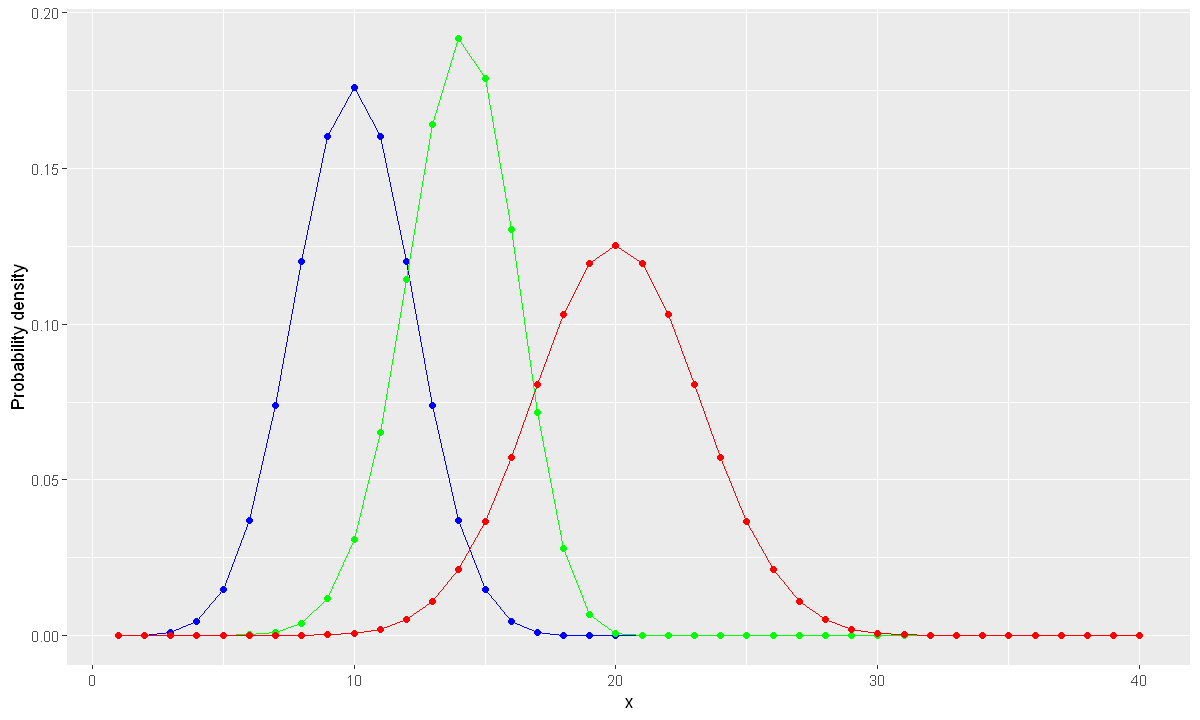

In [2]:
# Probability of success
p = c(0.5, 0.7, 0.5)

# Number of trials
n = c(20, 20, 40)

x = 1:40

# Calculate the probability density at each of the 'x' points
y1 = dbinom(x, n[1], p[1])
y2 = dbinom(x, n[2], p[2])
y3 = dbinom(x, n[3], p[3])

# Build a dataframe for plotting purposes
df = data.frame(x=x, y1=y1, y2=y2, y3=y3)

# Plot the probability distributions
ggplot(df, aes(x=x)) + 
    geom_point(aes(y=y1), color="blue") +
    geom_line(aes(y=y1), color="blue")  +
    geom_point(aes(y=y2), color="green") +
    geom_line(aes(y=y2), color="green") +
    geom_point(aes(y=y3), color="red") +
    geom_line(aes(y=y3), color="red") +
    xlab('x') +
    ylab('Probability density')

## Bayesian Inference

In [3]:
# Generate samples
n = 20
p = 0.3
samples = rbinom(10, n, p)

# Show the samples
cat(samples)

7 6 5 3 3 5 9 3 7 6

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10
   Unobserved stochastic nodes: 1
   Total graph size: 14

Initializing model



Warning message in MCMCsummary(samp, round = 2):
"Rhat statistic cannot be calculated with one chain. NAs inserted."


,mean,sd,2.5%,50%,97.5%,Rhat,n.eff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
p,0.27,0.03,0.21,0.27,0.34,NA,12545


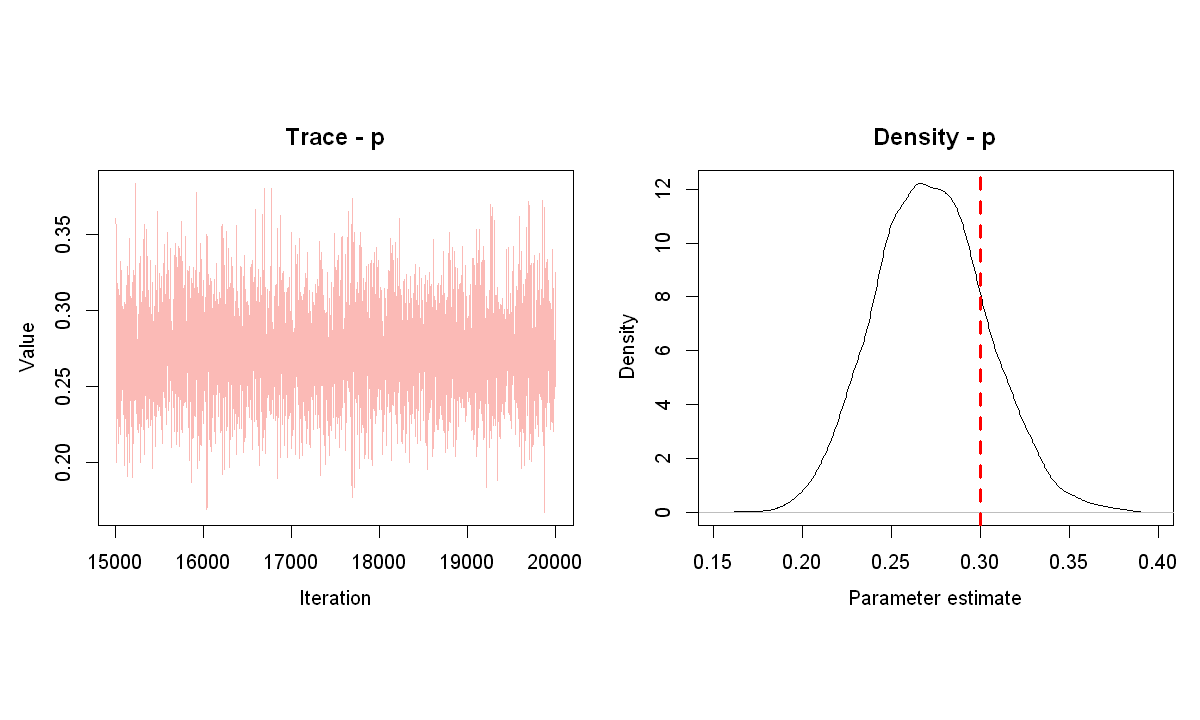

In [4]:
# Infer the parameters of the Binomial distribution using JAGS
model_string = "
model {
    # Prior
    p ~ dbeta(1,1)    # Probability of a success

    # Likelihood
    for (i in 1:N_samples) {
        y[i] ~ dbinom(p, n)
    }
}
"

model = jags.model(textConnection(model_string),
                   data = list(y=samples, 
                               N_samples=length(samples), 
                               n=n))

update(model, 10000, progress.bar="none")

samp <- coda.samples(model, 
                     variable.names=c("p"), 
                     n.iter=20000, progress.bar="none")

# Show a summary of the variables
MCMCsummary(samp, round = 2)

MCMCtrace(samp, 
          gv=c(p),
          pdf=FALSE)